In [1]:
import numpy as np
import h5py
import tensorflow as tf
from keras.models import Model, load_model
from keras import backend as K

Using TensorFlow backend.


In [2]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
config = tf.ConfigProto(gpu_options=gpu_options)
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

K.set_session(sess)

In [3]:
model = load_model(r"C:\Users\CCheny\Documents\Bioinformatics\MS2-Autoencoder\models\autoencoder\autoencoder_10_10_2000.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



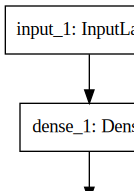

In [4]:
import pydot
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              4002000   
Total params: 8,004,000
Trainable params: 8,004,000
Non-trainable params: 0
_________________________________________________________________


In [6]:
def generator(X_data, y_data, batch_size):
    print('generator initiated')
    steps_per_epoch = X_data.shape[0]
    number_of_batches = steps_per_epoch // batch_size
    i = 0
    
    while True:
        X_batch = X_data[i*batch_size:(i+1)*batch_size]
        y_batch = y_data[i*batch_size:(i+1)*batch_size]
        i += 1
        yield X_batch, y_batch
        print('\ngenerator yielded a batch %s' %i)
        
        if i >= number_of_batches:
            i = 0

In [7]:
def test_generator(X_data, batch_size):
    print('generator initiated')
    steps_per_epoch = X_data.shape[0]
    number_of_batches = steps_per_epoch // batch_size
    i = 0

    while True: 
        X_batch = X_data[i*batch_size:(i+1)*batch_size]
        i += 1
        yield X_batch
        print('\ngenerator yielded a batch %s' %i)

        if i >= number_of_batches:
            i = 0

In [8]:
def predict_model(model, X_data):
    batch_size = 100
    prediction = model.predict_generator(generator=test_generator(X_data, batch_size),
                                            max_queue_size=20,
                                            steps=X_data.shape[0] // batch_size)
    return prediction

In [9]:
def eval_model(model, X_data, y_data):
    batch_size = 100
    evaluation = model.evaluate_generator(generator=generator(X_data, y_data, batch_size),
                                            max_queue_size=20,
                                            steps=X_data.shape[0] // batch_size)
    return evaluation

In [10]:
f = h5py.File(r"C:\Users\CCheny\Documents\Bioinformatics\MS2-Autoencoder\data\10sec_rt_data.hdf5")
dataset_low = f['low_peaks']
dataset_high = f['high_peaks']

In [11]:
prediction = predict_model(model, dataset_low[:100])

generator initiated

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1


In [12]:
evaluation = eval_model(model, dataset_low[:100], dataset_high[:100])
print('\nTesting accuracy: ', evaluation[1])

generator initiated

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

generator yielded a batch 1

Testing accuracy:  0.14000000059604645


In [13]:
sess.close()

0.994913
0.51386654
0.99288315


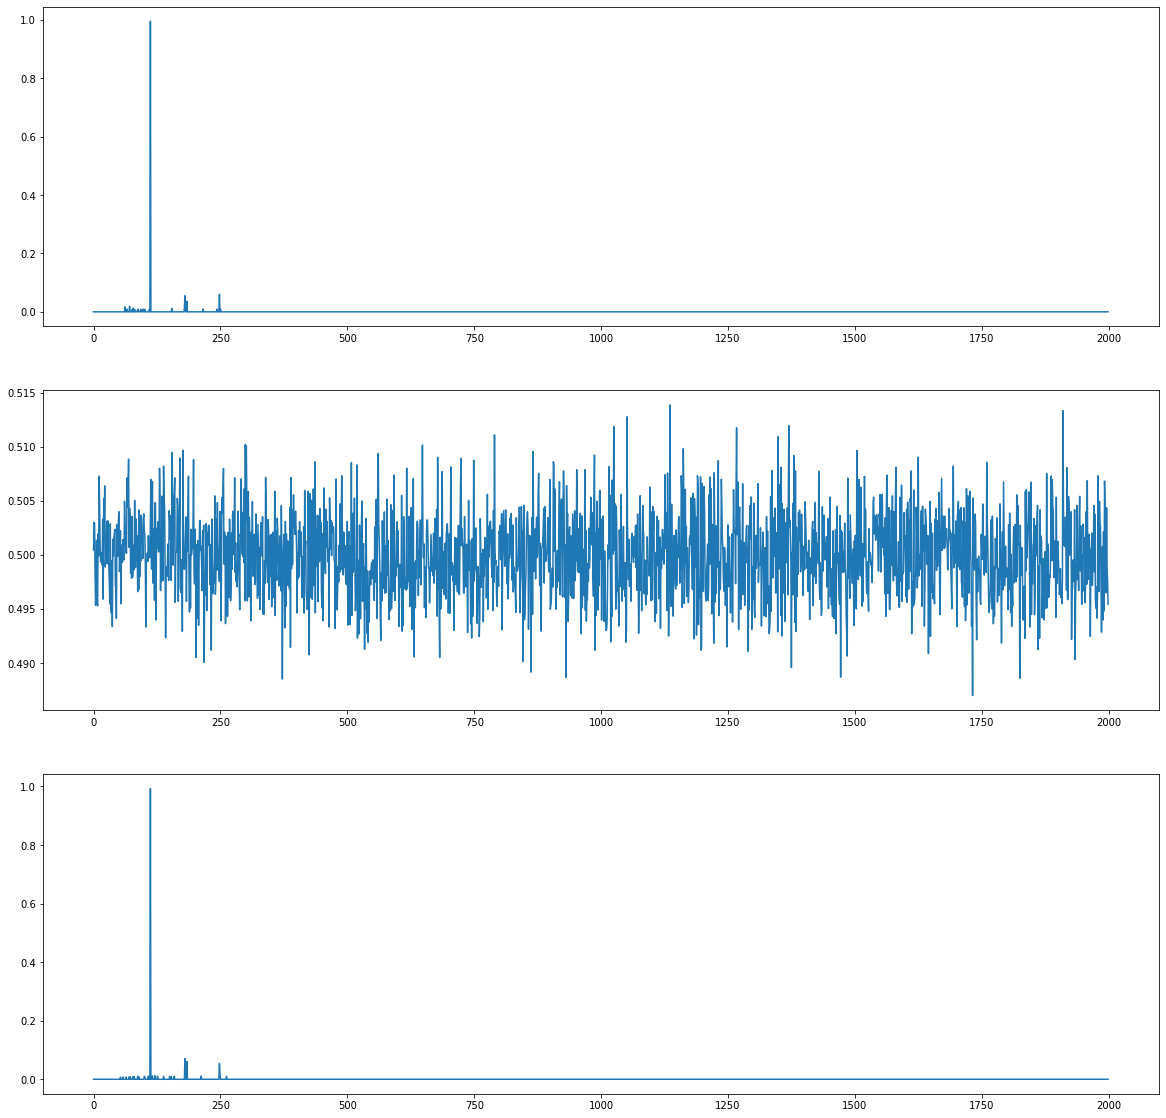

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(20,20))
i = 0
first = dataset_low[i]
second = prediction[i]
third = dataset_high[i]
top_max = dataset_high[i]

axs[0].plot(range(0, 2000), first)
#axs[0].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(first))

axs[1].plot(range(0, 2000), second)
#axs[1].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(second))

axs[2].plot(range(0, 2000), third)
#axs[2].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(third))